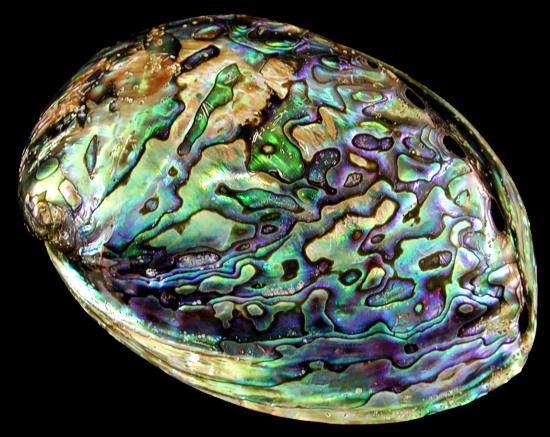

In [2]:
from IPython.display import Image
Image("abalone_concha.jpg")


Acurácia: 40.0 %


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.metrics import precision_score
import csv
import pandas as bib
leitor = csv.reader(open("/home/mmrosa/MEGA/MEGAsync/GitHub Commits/TEIA/Teia 18-02-2017/abalone.csv","r"))

matriz1 = []
matriz2 = []

class RegressaoLog:
    
    def __init__(self):
        pass
    
    def h(self, thetas, linhaMatriz):
        valor = 1/(1 + (1/np.exp(np.dot(thetas,[1]+linhaMatriz))))
        if valor > 1.5:
            return valor
        else:
            valor = 1       
        return valor
    
    def custo(self, thetas, exemplos, gabarito):
        
        resultado = 0
        m = len(gabarito)
       
        for i in range(m):
            hx = self.h(thetas, exemplos[i])
            n = 1 - hx
            resultado = resultado + (gabarito[i] * np.log10(hx) + (1-gabarito[i]) * np.log10(n))
        
        return resultado/m
    
    def somatorio(self, thetas, exemplos, gabarito, j):
        resultado = 0
        linha = len(gabarito)
        
        for i in range(linha):
            if j-1 < 0:
                resultado = resultado + self.h(thetas, exemplos[i]) - gabarito[i]
            else:
                resultado = resultado + (self.h(thetas, exemplos[i]) - gabarito[i])*exemplos[i][j-1]
        
        return resultado
    
    def train(self, thetas, exemplos, gabarito):
        aux = [0.0]*len(thetas)
        alfa = 0.05
        m = len(gabarito)
        
        for iteracoes in range(1500):
            for i in range(len(thetas)):
                coluna = i
                aux[i] = thetas[i] - (alfa/m) * self.somatorio(thetas, exemplos, gabarito, coluna)

            thetas = aux[:]
            #j = self.custo(thetas, exemplos, gabarito)
            #plt.scatter(i,j, color="red")
        
        return RegressaoLogPredictor(thetas)
        
class RegressaoLogPredictor:
    
    def __init__(self, thetas):
        self.theta = thetas
        
    def predict(self, samples):  
        result = []
        valor = 0
        #print(self.theta)
        for sample in samples:
            valor = 1/(1 + (1/np.exp(np.dot(self.theta,[1]+sample))))
            if valor >= 1.5:
                return valor
            else:
                valor = 1                   
            result.append(valor)                 
        return result

def binarizarDados():

    for row in leitor: 
        matriz1.append(row)
        matriz2.append(row[1:8])


    for i,linha in enumerate(matriz1):
        if linha[0] == 'M':
            matriz2[i] = [1,0,0] + matriz2[i] 
        if linha[0] == 'F':
            matriz2[i] = [0,1,0] + matriz2[i] 
        if linha[0] == 'I':
            matriz2[i] = [0,0,1] + matriz2[i] 
    return matriz2


def converte():
    
    matriz = binarizarDados()
    
    j = 0
    
    for i in range(len(matriz)):
        for j in range(len(matriz[0])):
            try:
                matriz[i][j] = int(matriz[i][j])
            except:
                matriz[i][j] = float(matriz[i][j])            
    return matriz

def pegaTarget():

    y = []

    for i,linha in enumerate(matriz1): 
        try:
            linha[8] = int(linha[8])
        except:
            linha[8] = float(linha[8])
            
        y.append(linha[8])
    return y

def taxa(resposta, predicao):
    
    acerto = 0
    n = len(resposta)
    for i in range(n):
        if resposta[i] == predicao[i]:
            acerto = acerto + 1
        
    return np.round((acerto/n)*100)

exemplos = converte()

In [ ]:
gabarito = pegaTarget()
thetas = [0,1,1,1,1,1,1,1,1,1,1]

conjunto_de_treino = exemplos[1020:]
gabarito_de_treino = gabarito[1020:]
conjunto_de_teste  = exemplos[1000:1010]
gabarito_de_teste  = gabarito[1000:1010]

preditor = linear_model.LogisticRegression(C=0.000003)
preditor.fit(conjunto_de_treino,gabarito_de_treino)
print("gabarito: ",gabarito_de_teste)
print("predição: ",preditor.predict(conjunto_de_teste))

# MÉTRICAS

In [ ]:
class Metricas:
    
    def __init__(self, r, p):
        self.resposta = r
        self.predicao = p

    def matriz_confusao(self, classes):
       
        tp, fn = 0,0
        n = len(classes)
        m = len(self.resposta)
        matriz = []
        TP, FN = [],[]
        
        # Calcula verdadeiros positivos e falsos negativos para ambas as classes
        for i in range(n):
            for j in range(m):
                if self.predicao[j] == self.resposta[j] and self.resposta[j] == classes[i]:
                    tp = tp+1
                else:
                    if self.predicao[j] != self.resposta[j] and self.resposta[j] == classes[i]:
                        fn = fn+1
            TP.append(tp)
            FN.append(fn)
            tp,fn = 0,0
            
        # Printa a matriz seta a matriz com os valores na ordem correta
        for i in range(len(TP)):
            matriz.append([TP[i]])
            for j in range(len(FN)):
                if i == len(TP)-1:
                    break
                else:
                    matriz.append([FN[j]])
            
        return matriz                
    
    def recall(self, classe):
        
        n = len(self.resposta)
        TP = 0
        FN = 0
        sai = False
        
        for j in range (len(classe)):
            if(not(sai)):
                for i in range(n):
                    if self.predicao[i] == self.resposta[i] and self.resposta[i] == classe[j]:
                        TP = TP+1
                        sai = True
                    else:
                        if self.predicao[i] != self.resposta[i] and self.resposta[i] == classe[j]:
                            FN = FN+1
                        
        print("TP:",TP)
        print("FN:",FN)
        return TP/(TP+FN)
    
    def precisao(self, classe):
        
        n = len(self.resposta)
        TP = 0
        FP = 0
        j = 0;
        
        return precision_score(self.resposta, self.predicao)
    
    def f1(self, classe):
        
        P = self.precisao(classe)
        R = self.recall(classe)
        
        return 2*P*R/(P+R)
    
    def acuracia(self):
        acerto = 0
        n = len(self.resposta)
        for i in range(n):
            if self.resposta[i] == self.predicao[i]:
                acerto = acerto + 1
        
        return np.round((acerto/n)*100)

    def f1_prec_recall(self, classe):
        
        f1, prec, recall = [],[],[]
        
        for i in range (len(classe)):
            prec.append(self.precisao(classe))
            recall.append(self.recall(classe))
            f1.append(self.f1(classe))
            
        return(f1, prec, recall)
    
    def macro_f1(self, classes):
        
        p_linha = 0
        r_linha = 0
        n = len(classes)
        
        for i in range(n):
            p_linha = p_linha + self.precisao(classes)
            r_linha = r_linha + self.recall(classes)
            
        p_linha = p_linha/n
        r_linha = r_linha/n
        
        return 2*p_linha*r_linha/(p_linha + r_linha)

    def micro_f1(self, classes):
        
        n = len(classes)
        p_geral = 0
        r_geral = 0
        
        for i in range(n):
            p_geral = p_geral + self.precisao(classes)
            r_geral = r_geral + self.recall(classes)

        p_geral = p_geral/n
        r_geral = r_geral/n
        
        return 2*p_geral*r_geral/(p_geral+r_geral)
    
classe = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
teste = [1, 0]

#a = [1,2,1,0,1,2]
#b = [1,2,0,1,0,0]

super_metrica = Metricas(gabarito_de_teste, preditor.predict(conjunto_de_teste))
#super_metrica = Metricas(a, b)
print("Acurácia:",super_metrica.acuracia(),"%")
#print("Precisão:", np.round(super_metrica.precisao(teste),4)*100,"%")
#print("Recall:", np.round(super_metrica.recall(teste),4)*100,"%")
#print("MICRO F1",super_metrica.micro_f1(classe))
#print("MATRIZ DE CONFUSÃO:\n", super_metrica.matriz_confusao(classe))